In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import math

In [2]:
# take first 8 time slices
cols = list(range(0,13*8)) 

In [3]:
eosdir_pos = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-positive/'
eosdir_neg = '/eos/uscms/store/user/jennetd/smart-pixels/dataset678/unflipped-negative/'

df = pd.DataFrame()
df_true = pd.DataFrame()

i=0
print('Processing + charge')
for f in os.listdir(eosdir_pos):

    if 'recon' in f:
        continue
    
    i = i + 1
    if i > 2:
        break
                                
    thisdf = pd.read_csv(eosdir_pos+'recon3D_'+f.split('_')[1])
    df_true = pd.concat([df_true,pd.read_csv(eosdir_pos+f)])
    
    df = pd.concat([df,thisdf])

Processing + charge


In [4]:
event_choice = 11

a = np.array(df.iloc[event_choice]).reshape(20,13,21)
lastslice = a[-1,:,:]

print(df_true.iloc[event_choice])

x-entry              278.896057
y-entry              -10.670530
z-entry              100.000000
n_x                   -8.127805
n_y                    0.105004
n_z                   -1.908464
number_eh_pairs    36726.000000
y-local                2.284760
pt                     1.918030
cotAlpha               4.258820
cotBeta               -0.055020
y-midplane            -7.919522
x-midplane            65.955048
Name: 11, dtype: float64


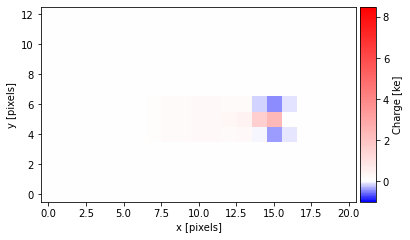

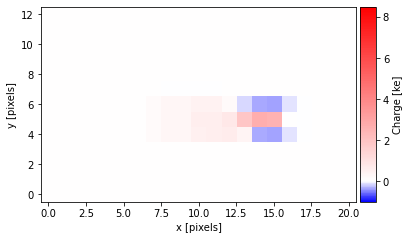

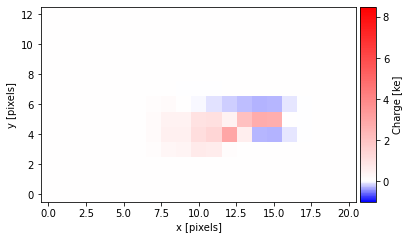

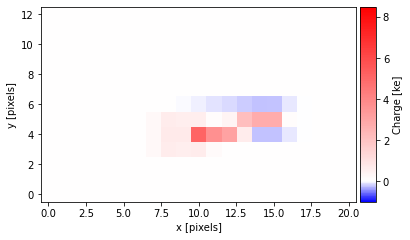

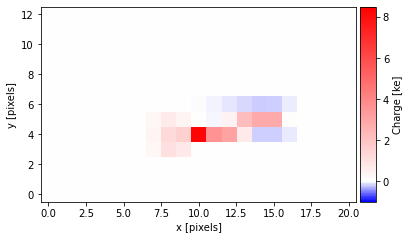

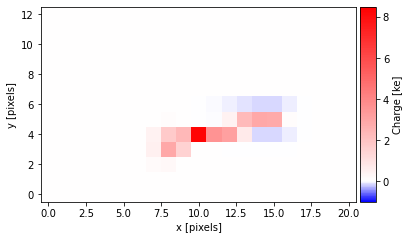

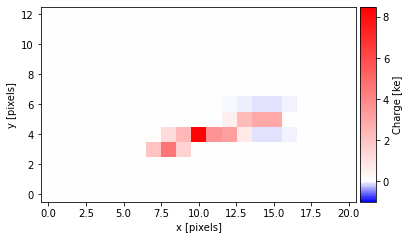

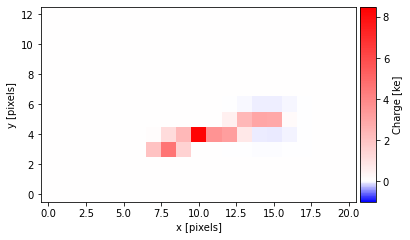

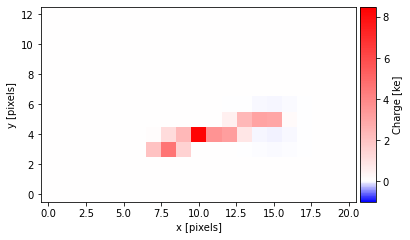

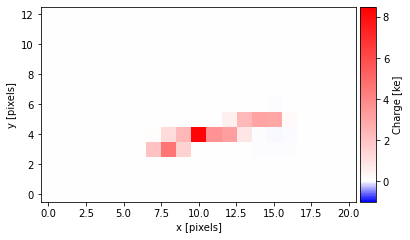

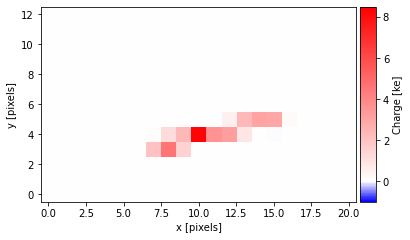

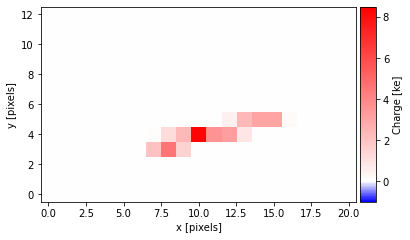

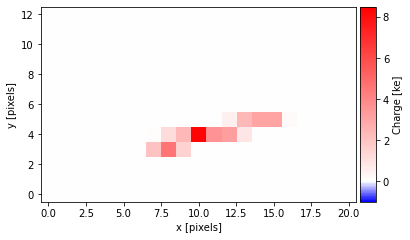

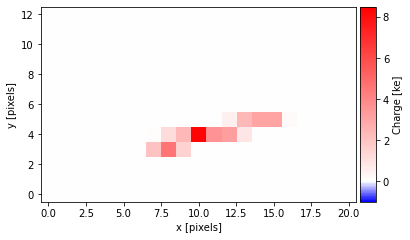

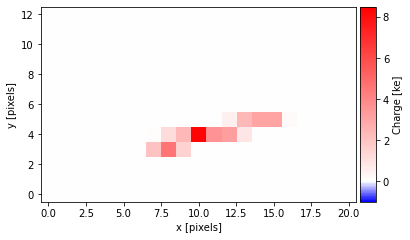

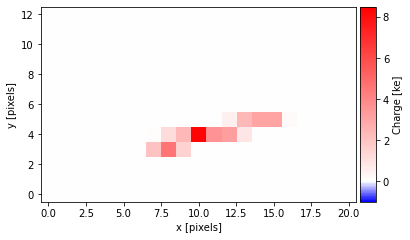

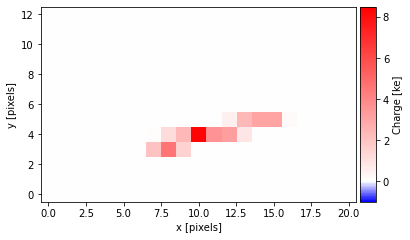

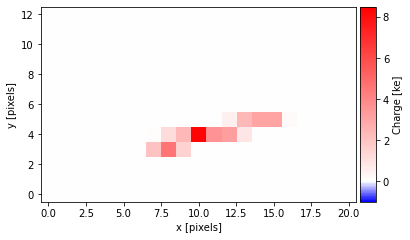

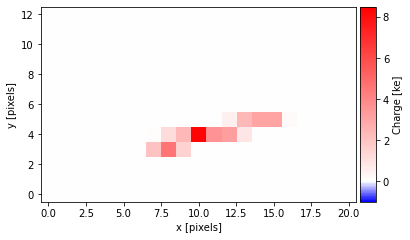

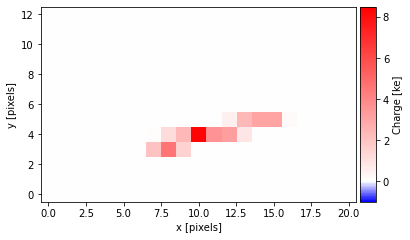

In [5]:
divnorm=colors.TwoSlopeNorm(vmin=-1., vcenter=0., vmax=8.5)

for i in range(0,20):
    fig, ax = plt.subplots(1,1)
    im = ax.imshow(a[i,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm)
    im.set_clim(-1,8.5)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
   
    plt.colorbar(im, cax=cax,label='Charge [ke]')
    ax.set_xlabel('x [pixels]')
    ax.set_ylabel('y [pixels]')
    
    fig.savefig('figures/image_'+str(i)+'.png',bbox_inches='tight')
    plt.show()  

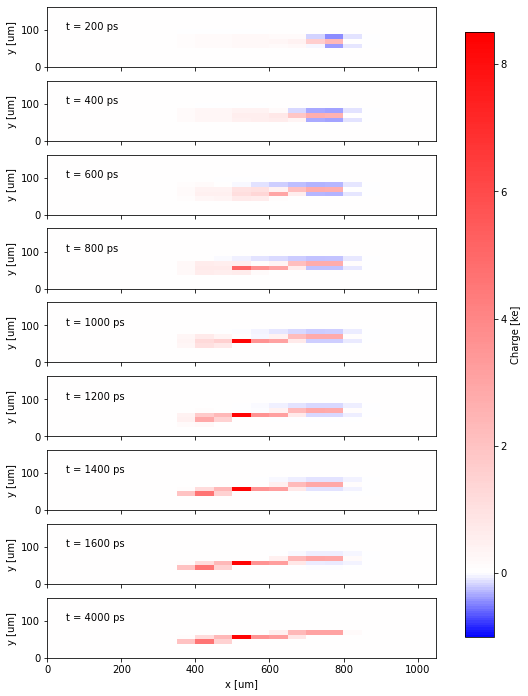

In [6]:
divnorm=colors.TwoSlopeNorm(vmin=-1., vcenter=0., vmax=8.5)

word = ['t = 200 ps', 
        't = 400 ps', 
        't = 600 ps', 
        't = 800 ps', 
        't = 1000 ps', 
        't = 1200 ps', 
        't = 1400 ps', 
        't = 1600 ps', 
        't = 4000 ps']

fig, ax = plt.subplots(9,1,figsize=(8,12),sharex=True,sharey=True)

for i in range(0,8):
    
    
    im = ax[i].imshow(a[i,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm,extent=(0,21*50,0,13*12.5))
    im.set_clim(-1,8.5)
    ax[i].set_ylabel('y [um]')
    ax[i].text(50,100,word[i])

im = ax[8].imshow(a[-1,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm,extent=(0,21*50,0,13*12.5))
im.set_clim(-1,8.5)
ax[8].set_xlabel('x [um]')
ax[8].set_ylabel('y [um]')
ax[8].text(50,100,word[8])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Charge [ke]')

    
fig.savefig('figures/image_oneplot.png',bbox_inches='tight')
plt.show() 

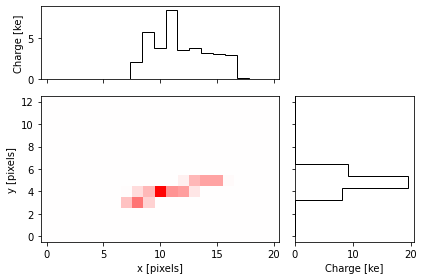

In [7]:
h = lastslice

# Projected histograms inx and y
hx, hy = h.sum(axis=0), h.sum(axis=1)

# Define size of figure
# Define size of figure
fig, ax = plt.subplots(2,2,gridspec_kw={'width_ratios': [2, 1],'height_ratios':[1,2]})
fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.05)

# Define the positions of the subplots.
ax0 = ax[1,0]
axx = ax[0,0]
axy = ax[1,1]

ax[0,1].axis('off')

im = ax0.imshow(h, interpolation='nearest',origin='lower', cmap='bwr',norm=divnorm)
im.set_clim(-1000,8500)
ax0.set_xlabel('x [pixels]')
ax0.set_ylabel('y [pixels]')
ax0.set_aspect('auto')

# Remove tick labels
#nullfmt = NullFormatter()
#axx.xaxis.set_major_formatter(nullfmt)
#axx.yaxis.set_major_formatter(nullfmt)
#axy.xaxis.set_major_formatter(nullfmt)
#axy.yaxis.set_major_formatter(nullfmt)

# Top plot
axx.hist(x=np.linspace(0,21,21),bins=np.linspace(0,22,22),weights=hx/1000,histtype='step',color='black')
axx.set_xlim(ax0.get_xlim())
axx.set_ylabel('Charge [ke]')
axx.set_xticklabels([])

# Right plot
axy.hist(x=np.linspace(0,13,13),bins=np.linspace(0,14,14),weights=hy/1000,orientation=u'horizontal',histtype='step',color='black')
axy.set_ylim(ax0.get_ylim())
axy.set_yticklabels([])
axy.set_xlabel('Charge [ke]')

fig.tight_layout()
plt.savefig('figures/profiles.png')